# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time as timestamp
from scipy.stats import linregress
import pprint 
import json


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

578

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'
query_url = f"{url}appid={weather_api_key}&q={cities[0]}&units={units}"

response = requests.get(query_url).json()

# Print data
response

{'coord': {'lon': -139.03, 'lat': -9.8},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 82.2,
  'feels_like': 84.52,
  'temp_min': 82.2,
  'temp_max': 82.2,
  'pressure': 1011,
  'humidity': 65,
  'sea_level': 1011,
  'grnd_level': 1010},
 'wind': {'speed': 8.75, 'deg': 92},
 'clouds': {'all': 0},
 'dt': 1584327400,
 'sys': {'country': 'PF', 'sunrise': 1584285616, 'sunset': 1584329370},
 'timezone': -34200,
 'id': 4020109,
 'name': 'Atuona',
 'cod': 200}

In [4]:
# Create dictionary for provided data
data_count = {"city": [],
       "cloudiness": [],
       "country": [],
       "date": [],
       "humidity": [],
       "lat": [],
       "lng": [],
       "max_temp": [],
       "wind_speed": []}

print('Beginning Data Retrieval')
print('-------------------------')

number_count = 0
set_count = 1

# Build query URL
for city in cities:
    try:
        query_url = url + "appid=" + weather_api_key + "&q=" + city + '&units=' + units
        response = requests.get(query_url).json()
        number_count = number_count + 1
        print(f"Processing Record {number_count} of Set {set_count}|{city}")
        data_count["city"].append(response['name'])
        data_count["cloudiness"].append(response['clouds']['all'])
        data_count["country"].append(response['sys']['country'])
        data_count["date"].append(response['dt'])
        data_count["humidity"].append(response['main']['humidity'])
        data_count["lat"].append(response['coord']['lat'])
        data_count["lng"].append(response['coord']['lon'])
        data_count["max_temp"].append(response['main']['temp_max'])
        data_count["wind_speed"].append(response['wind']['speed'])

    except:
        print("City not found. Skipping...")
    if number_count == 50:
        set_count = set_count + 1
        number_count = 0

print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

Beginning Data Retrieval
-------------------------
Processing Record 1 of Set 1|atuona
Processing Record 2 of Set 1|castro
Processing Record 3 of Set 1|yellowknife
Processing Record 4 of Set 1|la ciotat
Processing Record 5 of Set 1|rikitea
Processing Record 6 of Set 1|shillong
Processing Record 7 of Set 1|katsuura
Processing Record 8 of Set 1|hami
Processing Record 9 of Set 1|gobabis
Processing Record 10 of Set 1|avarua
Processing Record 11 of Set 1|olafsvik
Processing Record 12 of Set 1|livingstonia
Processing Record 13 of Set 1|hithadhoo
Processing Record 14 of Set 1|khorinsk
Processing Record 15 of Set 1|ushuaia
Processing Record 16 of Set 1|saint-philippe
Processing Record 17 of Set 1|cherskiy
Processing Record 18 of Set 1|sobolevo
Processing Record 19 of Set 1|sretensk
Processing Record 20 of Set 1|santa fe
Processing Record 21 of Set 1|dikson
Processing Record 22 of Set 1|zorritos
Processing Record 23 of Set 1|sioux lookout
Processing Record 24 of Set 1|pacifica
Processing Record

Processing Record 48 of Set 4|tomatlan
Processing Record 49 of Set 4|fortuna
Processing Record 50 of Set 4|przasnysz
Processing Record 1 of Set 5|klaksvik
Processing Record 2 of Set 5|tuatapere
Processing Record 3 of Set 5|bac lieu
Processing Record 4 of Set 5|lima
Processing Record 5 of Set 5|chaozhou
Processing Record 6 of Set 5|opuwo
Processing Record 7 of Set 5|nikolskoye
Processing Record 8 of Set 5|tiarei
Processing Record 9 of Set 5|kuytun
Processing Record 10 of Set 5|camana
Processing Record 11 of Set 5|luanda
Processing Record 12 of Set 5|lagoa vermelha
Processing Record 13 of Set 5|mys shmidta
City not found. Skipping...
Processing Record 14 of Set 5|puerto el triunfo
Processing Record 15 of Set 5|cidreira
Processing Record 16 of Set 5|sorgun
Processing Record 17 of Set 5|college
Processing Record 18 of Set 5|arrecife
Processing Record 19 of Set 5|wewak
Processing Record 20 of Set 5|nanakuli
Processing Record 21 of Set 5|komsomolskiy
Processing Record 22 of Set 5|adrar
Proce

Processing Record 3 of Set 9|gat
Processing Record 4 of Set 9|buariki
City not found. Skipping...
Processing Record 5 of Set 9|turayf
Processing Record 6 of Set 9|axim
Processing Record 7 of Set 9|binga
Processing Record 8 of Set 9|taipu
Processing Record 9 of Set 9|belmonte
Processing Record 10 of Set 9|fairview
Processing Record 11 of Set 9|verkhovazhye
Processing Record 12 of Set 9|yeltsovka
City not found. Skipping...
Processing Record 13 of Set 9|mangrol
Processing Record 14 of Set 9|havre-saint-pierre
Processing Record 15 of Set 9|arman
Processing Record 16 of Set 9|alice springs
Processing Record 17 of Set 9|senekal
Processing Record 18 of Set 9|nieves
Processing Record 19 of Set 9|cairns
Processing Record 20 of Set 9|agadir
Processing Record 21 of Set 9|krasnoselkup
Processing Record 22 of Set 9|egvekinot
Processing Record 23 of Set 9|the pas
Processing Record 24 of Set 9|urumqi
Processing Record 25 of Set 9|jibuti
Processing Record 26 of Set 9|samalaeulu
City not found. Skippi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create DataFrame
data_weather_df = pd.DataFrame(data_count)
data_weather_df.count()

city          528
cloudiness    528
country       528
date          528
humidity      528
lat           528
lng           528
max_temp      528
wind_speed    528
dtype: int64

In [6]:
data_weather_df

,city,cloudiness,country,date,humidity,lat,lng,max_temp,wind_speed
0,Atuona,0,PF,1584327400,65,-9.80,-139.03,82.20,8.75
1,Castro,13,BR,1584326936,86,-24.79,-50.01,65.79,3.42
2,Yellowknife,20,CA,1584327250,66,62.46,-114.35,10.40,18.34
3,La Ciotat,0,FR,1584327401,57,43.17,5.60,55.40,10.29
4,Rikitea,3,PF,1584327401,79,-23.12,-134.97,79.63,12.71
...,...,...,...,...,...,...,...,...,...
523,Abu Samrah,2,SY,1584327428,86,35.30,37.18,51.85,4.85
524,Soe,42,ID,1584327060,58,-9.86,124.28,85.14,4.56
525,Kattivākkam,40,IN,1584326876,83,13.22,80.32,84.00,2.24
526,Kathmandu,20,NP,1584327386,62,27.72,85.32,55.40,2.24


In [7]:
# Export into a .csv
output_data_file = "../output_data/cities.csv"

city_data = zip('city', 
                 'cloudiness', 
                 'country', 
                 'date', 
                 'humidity', 
                 'lat',
                 'lng', 
                 'max_temp', 
                 'wind_speed')

with open(output_data_file, 'w') as datafile:
    data_weather_df.to_csv(output_data_file)

# city_data_df.to_csv(city_data.csv)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

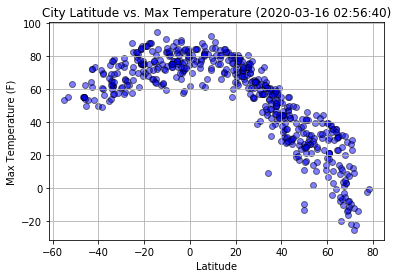

In [33]:
# Date
data_weather_df['date'] = pd.to_datetime(data_weather_df['date'], unit='s')
date = data_weather_df['date'][0]
# date = date.strf("%m-%d-%Y")

plt.scatter(data_weather_df['lat'], data_weather_df['max_temp'],color='b', alpha = 0.5, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature ({date})')
plt.grid(b=None, which='major', axis='both')

plt.savefig("lat_vs_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

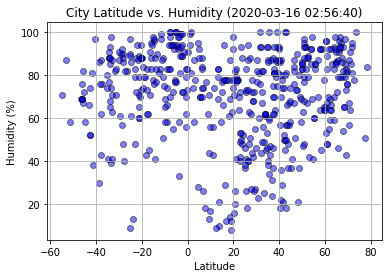

In [32]:
plt.scatter(data_weather_df['lat'], data_weather_df['humidity'],color='b', alpha = 0.5, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({date})')
plt.grid(b=None, which='major', axis='both')

plt.savefig("lat_vs_humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

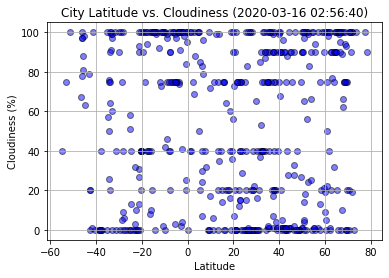

In [31]:
plt.scatter(data_weather_df['lat'], data_weather_df['cloudiness'],color='b', alpha = 0.5, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({date})')
plt.grid(b=None, which='major', axis='both')

plt.savefig("lat_vs_cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

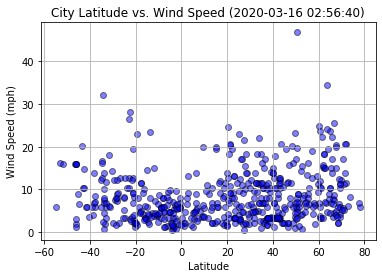

In [30]:
plt.scatter(data_weather_df['lat'], data_weather_df['wind_speed'],color='b', alpha = 0.5, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed ({date})')
plt.grid(b=None, which='major', axis='both')

plt.savefig("lat_vs_wind.png")
plt.show()

## Linear Regression

In [12]:
# Create Northern Hemisphere DataFrame
northern_hemisphere_df = data_weather_df[data_weather_df['lat'] >= 0]
northern_hemisphere_df

,city,cloudiness,country,date,humidity,lat,lng,max_temp,wind_speed
2,Yellowknife,20,CA,2020-03-16 02:54:10,66,62.46,-114.35,10.40,18.34
3,La Ciotat,0,FR,2020-03-16 02:56:41,57,43.17,5.60,55.40,10.29
5,Shillong,20,IN,2020-03-16 02:56:41,83,25.57,91.88,75.20,3.04
6,Katsuura,75,JP,2020-03-16 02:50:45,40,35.13,140.30,57.00,16.11
7,Kumul,0,CN,2020-03-16 02:56:41,18,42.80,93.45,47.59,3.09
...,...,...,...,...,...,...,...,...,...
522,Qalyub,40,EG,2020-03-16 02:57:08,82,30.18,31.21,62.60,10.29
523,Abu Samrah,2,SY,2020-03-16 02:57:08,86,35.30,37.18,51.85,4.85
525,Kattivākkam,40,IN,2020-03-16 02:47:56,83,13.22,80.32,84.00,2.24
526,Kathmandu,20,NP,2020-03-16 02:56:26,62,27.72,85.32,55.40,2.24


In [13]:
# Create Southern Hemisphere DataFrame
southern_hemisphere_df = data_weather_df[data_weather_df['lat'] < 0]
southern_hemisphere_df

,city,cloudiness,country,date,humidity,lat,lng,max_temp,wind_speed
0,Atuona,0,PF,2020-03-16 02:56:40,65,-9.80,-139.03,82.20,8.75
1,Castro,13,BR,2020-03-16 02:48:56,86,-24.79,-50.01,65.79,3.42
4,Rikitea,3,PF,2020-03-16 02:56:41,79,-23.12,-134.97,79.63,12.71
8,Gobabis,0,NA,2020-03-16 02:51:47,88,-22.45,18.97,69.80,3.06
9,Avarua,100,CK,2020-03-16 02:50:11,79,-21.21,-159.78,84.20,6.93
...,...,...,...,...,...,...,...,...,...
504,Yeppoon,32,AU,2020-03-16 02:57:07,48,-23.13,150.73,82.40,10.29
511,Tete,10,MZ,2020-03-16 02:57:07,83,-16.16,33.59,71.60,2.84
513,Barretos,100,BR,2020-03-16 02:57:07,94,-20.56,-48.57,71.06,4.00
520,Manokwari,84,ID,2020-03-16 02:57:08,70,-0.87,134.08,79.81,5.59


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.8038383243512234.


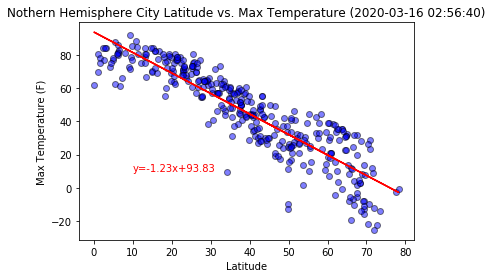

In [29]:
plt.scatter(northern_hemisphere_df['lat'], northern_hemisphere_df['max_temp'],color='b', alpha = 0.5, edgecolors='black')

x_values = northern_hemisphere_df['lat']
y_values = northern_hemisphere_df['max_temp']

# Linear regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10), fontsize=10, color="red")

r_squared = rvalue**2
print(f"The r-squared is {r_squared}.")

# Labels
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'Nothern Hemisphere City Latitude vs. Max Temperature ({date})')

plt.savefig("northern_hem_temp.png")
plt.show()

#  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.3646883641138473.


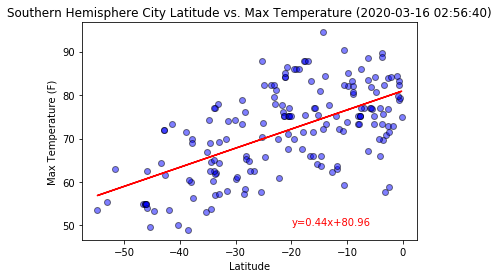

In [28]:
plt.scatter(southern_hemisphere_df['lat'], southern_hemisphere_df['max_temp'],color='b', alpha = 0.5, edgecolors='black')

x_values = southern_hemisphere_df['lat']
y_values = southern_hemisphere_df['max_temp']

# Linear regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20, 50), fontsize=10, color="red")

r_squared = rvalue**2
print(f"The r-squared is {r_squared}.")

# Labels
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'Southern Hemisphere City Latitude vs. Max Temperature ({date})')

plt.savefig("southern_hem_temp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.06584631412065065.


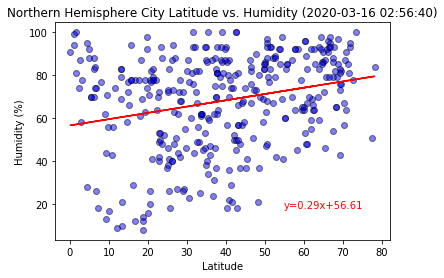

In [27]:
plt.scatter(northern_hemisphere_df['lat'], northern_hemisphere_df['humidity'],color='b', alpha = 0.5, edgecolors='black')

x_values = northern_hemisphere_df['lat']
y_values = northern_hemisphere_df['humidity']

# Linear regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(55,18), fontsize=10, color="red")

r_squared = rvalue**2
print(f"The r-squared is {r_squared}.")

# Labels
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Northern Hemisphere City Latitude vs. Humidity ({date})')

plt.savefig("northern_hem_humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.07010742795488868.


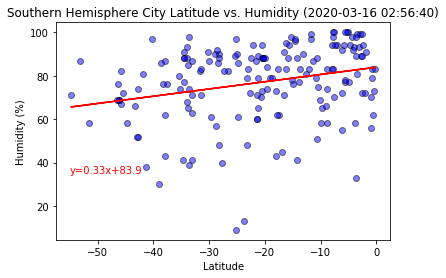

In [26]:
plt.scatter(southern_hemisphere_df['lat'], southern_hemisphere_df['humidity'],color='b', alpha = 0.5, edgecolors='black')

x_values = southern_hemisphere_df['lat']
y_values = southern_hemisphere_df['humidity']

# Linear regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,35), fontsize=10, color="red")

r_squared = rvalue**2
print(f"The r-squared is {r_squared}.")

# Labels
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Southern Hemisphere City Latitude vs. Humidity ({date})')

plt.savefig("southern_hem_humidity.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.0265456858783601.


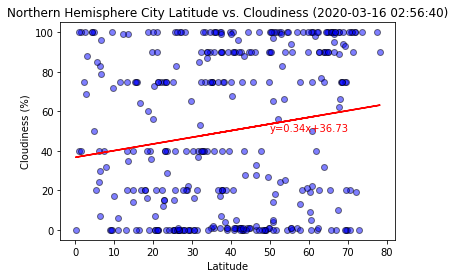

In [25]:
plt.scatter(northern_hemisphere_df['lat'], northern_hemisphere_df['cloudiness'],color='b', alpha = 0.5, edgecolors='black')

x_values = northern_hemisphere_df['lat']
y_values = northern_hemisphere_df['cloudiness']

# Linear regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,50), fontsize=10, color="red")

r_squared = rvalue**2
print(f"The r-squared is {r_squared}.")

# Labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Northern Hemisphere City Latitude vs. Cloudiness ({date})')

plt.savefig("nothern_hem_cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.06062632832982179.


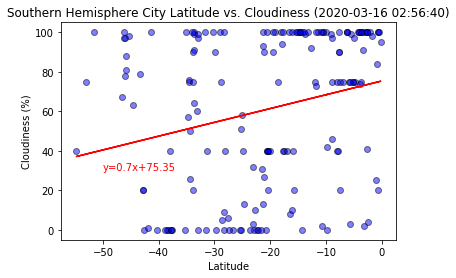

In [24]:
plt.scatter(southern_hemisphere_df['lat'], southern_hemisphere_df['cloudiness'],color='b', alpha = 0.5, edgecolors='black')

x_values = southern_hemisphere_df['lat']
y_values = southern_hemisphere_df['cloudiness']

# Linear regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30), fontsize=10, color="red")

r_squared = rvalue**2
print(f"The r-squared is {r_squared}.")

# Labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Southern Hemisphere City Latitude vs. Cloudiness ({date})')

plt.savefig("southern_hem_cloudiness.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.04145629060712258.


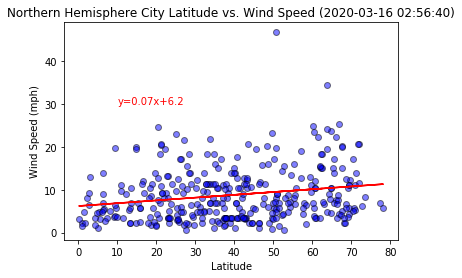

In [23]:
plt.scatter(northern_hemisphere_df['lat'], northern_hemisphere_df['wind_speed'],color='b', alpha = 0.5, edgecolors='black')


x_values = northern_hemisphere_df['lat']
y_values = northern_hemisphere_df['wind_speed']

# Linear regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,30), fontsize=10, color="red")

r_squared = rvalue**2
print(f"The r-squared is {r_squared}.")

# Labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Northern Hemisphere City Latitude vs. Wind Speed ({date})')

plt.savefig("nothern_hem_wind_speed.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.12402931884341584.


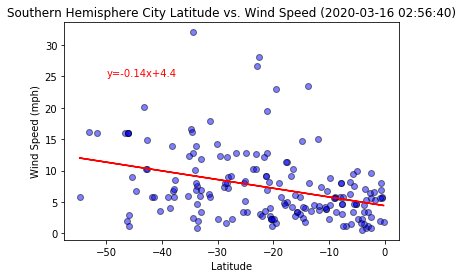

In [22]:
plt.scatter(southern_hemisphere_df['lat'], southern_hemisphere_df['wind_speed'],color='b', alpha = 0.5, edgecolors='black')


x_values = southern_hemisphere_df['lat']
y_values = southern_hemisphere_df['wind_speed']

# Linear regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25), fontsize=10, color="red")

r_squared = rvalue**2
print(f"The r-squared is {r_squared}.")

# Labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Southern Hemisphere City Latitude vs. Wind Speed ({date})')

plt.savefig("southern_hem_wind_speed.png")
plt.show()